# Analyze non-deterministic (flaky) behaviours for workflow & job reruns 

In [1]:
import sys
sys.path.append('..')
import pandas as pd
from tools.flakiness import *

from ast import literal_eval

## Build & analyze flakiness data for workflow reruns 

In [2]:
df_workflow_rerun = pd.read_csv('../data/dataframes/dataframe_workflow_rerun_distinct.csv.gz', index_col=0,converters={'reruns ids':literal_eval,'rerun conclusion':literal_eval,'content':literal_eval,'event':literal_eval})
wf_data_records = df_workflow_rerun[['repo path','reruns ids','content','rerun conclusion','branch','default','event']].to_dict('records')

In [3]:
# build flakiness data for workflow reruns

wf_flakiness_data = build_flakiness_data(wf_data_records, 'wf')

Successfully loaded 2344 flakiness sets.


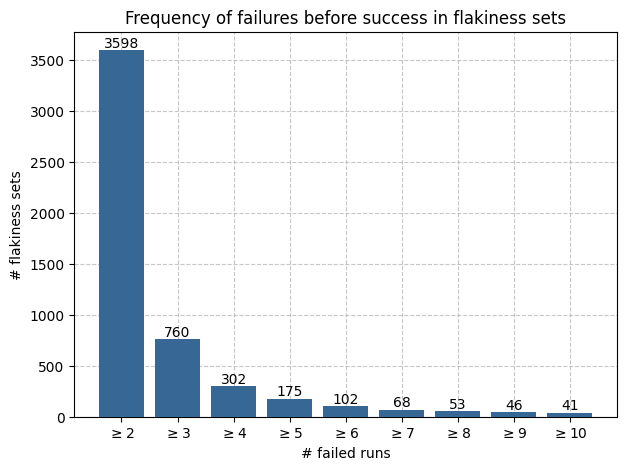

In [4]:
# how many failed runs do flakiness sets have before success?

show_frequency(wf_flakiness_data)

In [5]:
# generate csv file of flakiness sets for workflow reruns.

df_wf_flakiness = flakiness_df_generator(wf_flakiness_data) 
df_wf_flakiness.to_csv("flakiness_workflow_rerun.csv", index=False)

In [6]:
# print the workflow flakiness sets generated by distinct workflow files, ordered by the number of failed reruns before success.

flakiness_sets_printer(df_wf_flakiness,'wf', 5)

current number: 1
# reruns: 183
event: issues
branch: mc1.18/dev
https://github.com/Creators-of-Create/Create/actions/runs/6740751506
https://github.com/Creators-of-Create/Create/actions/runs/7129696769

current number: 2
# reruns: 38
event: schedule
branch: master
https://github.com/mediathekview/MediathekView/actions/runs/3825808067
https://github.com/mediathekview/MediathekView/actions/runs/4139498540

current number: 3
# reruns: 28
event: schedule
branch: master
https://github.com/firebase/firebase-admin-java/actions/runs/4899670919
https://github.com/firebase/firebase-admin-java/actions/runs/5030346546



## Build & analyze flakiness data for job reruns 

In [7]:
df_job_rerun = pd.read_csv('../data/dataframes/dataframe_job_rerun_distinct_with_conclusion.csv.gz', index_col=0, converters={'reruns ids':literal_eval,'rerun conclusion':literal_eval,'content':literal_eval,'event':literal_eval})
job_data_records = df_job_rerun[['repo path','reruns ids','rerun conclusion','branch','default','event']].to_dict('records')

In [8]:
# build flakiness data for job reruns

job_flakiness_data = build_flakiness_data(job_data_records, 'job')

Successfully loaded 5557 flakiness sets.


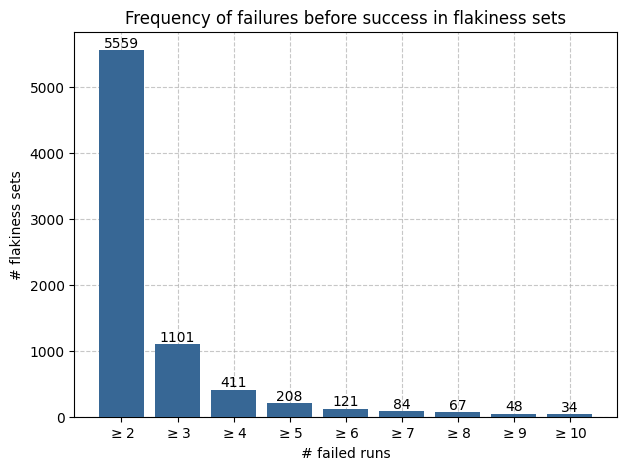

In [9]:
# how many failed runs do flakiness sets have before success?

show_frequency(job_flakiness_data)

In [10]:
# generate csv file of flakiness sets for job reruns.

df_job_flakiness = flakiness_df_generator(job_flakiness_data)
df_job_flakiness.to_csv("flakiness_job_rerun.csv", index=False)

In [11]:
# print the job flakiness sets generated by distinct workflow files, ordered by the number of failed reruns before success.

flakiness_sets_printer(df_job_flakiness,'job',20)

current number: 1
# reruns: 24
event: push
branch: master
https://github.com/vividus-framework/vividus/actions/runs/6100282356

current number: 2
# reruns: 11
event: push
branch: develop
https://github.com/huaweicloud/Sermant/actions/runs/7136805019

current number: 3
# reruns: 11
event: push
branch: master
https://github.com/pravega/pravega/actions/runs/7273119218

